In [9]:
%matplotlib inline
import leafmap
import pandas
import pandas as pd
import seaborn as sns

In [10]:
fafsa = pandas.read_excel("Copy of WI FAFSA Completions thru 042222.xlsx")
fafsa.columns

Index(['Name', 'City', 'State', 'Applications\nSubmitted\nApr22  2022',
       'Applications\nComplete\nApr22  2022',
       'Applications\nSubmitted\nApr22  2021',
       'Applications\nComplete\nApr22  2021',
       'Applications\nSubmitted\nJun  2021',
       'Applications\nComplete\nJun  2021',
       'Applications\nSubmitted\nDec  2021',
       'Applications\nComplete\nDec  2021'],
      dtype='object')

In [11]:
fafsa.rename(columns={'Applications\nSubmitted\nDec  2021':'SubDec21','Applications\nComplete\nDec  2021':'ComDec21','Applications\nComplete\nJun  2021':'ComJun21','Applications\nSubmitted\nJun  2021':'SubJun21', 'Applications\nComplete\nApr22  2021':'ComApr22-21', 'Applications\nSubmitted\nApr22  2021':'SubApr22-21', 'Applications\nComplete\nApr22  2022':'ComApr22-22', 'Applications\nSubmitted\nApr22  2022':'SubApr22-22'},inplace=True)

In [12]:
fafsa.columns

Index(['Name', 'City', 'State', 'SubApr22-22', 'ComApr22-22', 'SubApr22-21',
       'ComApr22-21', 'SubJun21', 'ComJun21', 'SubDec21', 'ComDec21'],
      dtype='object')

<AxesSubplot:xlabel='SubApr22-22', ylabel='ComApr22-22'>

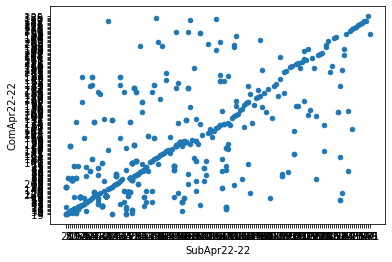

In [13]:
fafsa.plot.scatter(x='SubApr22-22',y='ComApr22-22')

In [15]:
import numpy as np
fafsa['ComApr22-22'].astype(object)
fafsa['SubApr22-22'].astype(object)

0       20
1        8
2       30
3       10
4       16
      ... 
581     31
582     10
583     50
584     66
585      6
Name: SubApr22-22, Length: 586, dtype: object

In [16]:
modfafsa=fafsa[fafsa['SubApr22-22']!='<5']
modfafsa=modfafsa[modfafsa['ComApr22-22']!='<5']
modfafsa

,Name,City,State,SubApr22-22,ComApr22-22,SubApr22-21,ComApr22-21,SubJun21,ComJun21,SubDec21,ComDec21
0,ABBOTSFORD MIDDLE/SENIOR HIGH,ABBOTSFORD,WI,20,19,24,23,26,25,29,28
1,ABUNDANT LIFE CHRISTIAN SCHOOL,MADISON,WI,8,8,9,9,9,9,11,11
2,ADAMS-FRIENDSHIP HIGH,ADAMS,WI,30,30,32,30,39,36,43,42
3,ALBANY HIGH,ALBANY,WI,10,9,11,11,11,11,11,11
4,ALGOMA HIGH,ALGOMA,WI,16,16,19,18,20,19,20,20
...,...,...,...,...,...,...,...,...,...,...,...
581,WITTENBERG-BIRNAMWOOD HIGH,WITTENBERG,WI,31,31,31,31,34,34,39,38
582,WONEWOC-CENTER HIGH,WONEWOC,WI,10,9,9,9,10,10,10,10
583,WRIGHTSTOWN HIGH,WRIGHTSTOWN,WI,50,48,56,55,62,60,66,63
584,XAVIER HIGH SCHOOL,APPLETON,WI,66,65,76,74,78,76,80,77


In [17]:
modfafsa['dfApr22-22']=modfafsa['SubApr22-22'].astype(int)-modfafsa['ComApr22-22'].astype(int)
modfafsa

,Name,City,State,SubApr22-22,ComApr22-22,SubApr22-21,ComApr22-21,SubJun21,ComJun21,SubDec21,ComDec21,dfApr22-22
0,ABBOTSFORD MIDDLE/SENIOR HIGH,ABBOTSFORD,WI,20,19,24,23,26,25,29,28,1
1,ABUNDANT LIFE CHRISTIAN SCHOOL,MADISON,WI,8,8,9,9,9,9,11,11,0
2,ADAMS-FRIENDSHIP HIGH,ADAMS,WI,30,30,32,30,39,36,43,42,0
3,ALBANY HIGH,ALBANY,WI,10,9,11,11,11,11,11,11,1
4,ALGOMA HIGH,ALGOMA,WI,16,16,19,18,20,19,20,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
581,WITTENBERG-BIRNAMWOOD HIGH,WITTENBERG,WI,31,31,31,31,34,34,39,38,0
582,WONEWOC-CENTER HIGH,WONEWOC,WI,10,9,9,9,10,10,10,10,1
583,WRIGHTSTOWN HIGH,WRIGHTSTOWN,WI,50,48,56,55,62,60,66,63,2
584,XAVIER HIGH SCHOOL,APPLETON,WI,66,65,76,74,78,76,80,77,1


<AxesSubplot:xlabel='SubApr22-22', ylabel='dfApr22-22'>

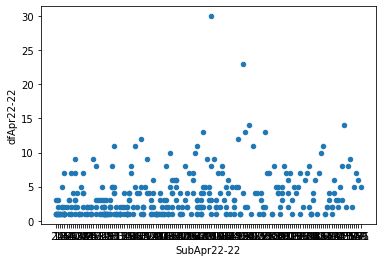

In [18]:
modfafsa=modfafsa[modfafsa['dfApr22-22']!=0]
modfafsa.plot.scatter(x='SubApr22-22', y='dfApr22-22')

In [20]:
total_sub=sum(modfafsa['SubApr22-22'].astype(int))
total_incomp=sum(modfafsa['dfApr22-22'])
percent_incomp=(total_incomp/total_sub)*100
print("Percent of submitted application that are incomplete for April 22-22: "+str(percent_incomp)+"%")

Percent of submitted application that are incomplete for April 22-22: 4.550840553950974%
